In [2]:
import scipy.io as sio
import numpy as np
from copy import deepcopy
from scipy.optimize import minimize
from matplotlib import pyplot as plt
from scipy.special import erf
from mpl_toolkits.mplot3d import Axes3D
import cmath
import matplotlib
#import hubbard_1d
#import quspin
#import fejer_kernel
#import fourier_filter
#import generate_cdf
#from qcels import *
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['lines.markersize'] = 10

/var/folders/0k/l2cqwppj67g8y4c4nt5v5q7w0000gn/T/ipykernel_54835/835858875.py:15: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(p,(1-p)/p*np.exp(-1/2)/((1-np.exp(-A/2))/A),linestyle="-.",marker="o",label="QCELS (new upper bound)")


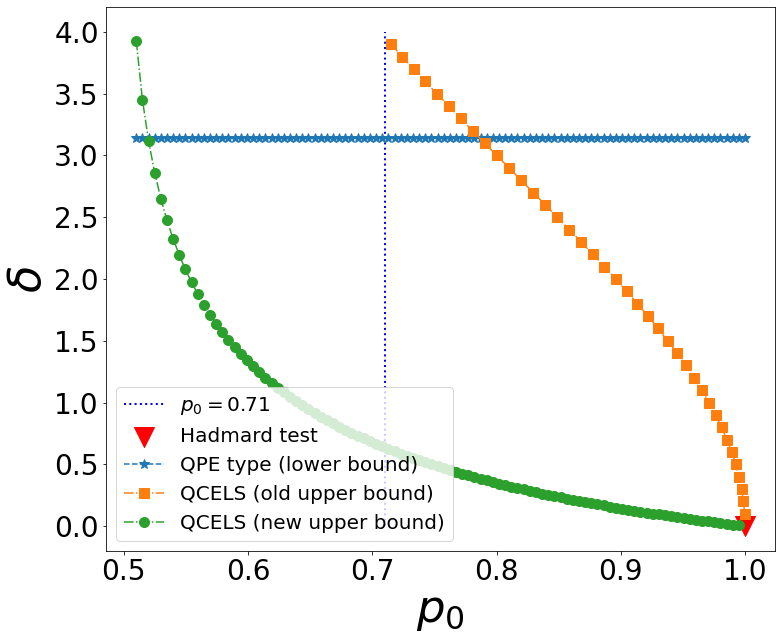

In [38]:
####---------Depth_theory-------------------
x=0.1+0.1*np.arange(int(1.5*np.pi/0.1))
alpha=1.217 #constant \alpha
d=np.zeros(len(x))
p=np.linspace(0.51,1, num=100)
A=2*np.log(p/(2*p-1))
for n in range(len(x)):
    a=x[n]*np.cos(x[n]/10)/(2*np.sin(x[n]/2))
    d[n]=a*alpha/((1+alpha)*a-1)
plt.figure(figsize=(12,10))
plt.vlines(x=0.71, ymin=0, ymax=4, colors='blue', ls=':', lw=2, label="$p_0=0.71$")
plt.scatter(1,0,marker="v",s=400,label='Hadmard test',c ="red")
plt.plot(p,np.pi*np.ones(len(p)),linestyle="--",marker="*",label="QPE type (lower bound)")
plt.plot(d[0:len(d)-8],x[0:len(d)-8],linestyle="-.",marker="s",label="QCELS (old upper bound)")
plt.plot(p,(1-p)/p*np.exp(-1/2)/((1-np.exp(-A/2))/A),linestyle="-.",marker="o",label="QCELS (new upper bound)")
plt.xlabel("$p_0$",fontsize=45)
plt.ylabel("$\delta$",fontsize=45) 
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.legend(fontsize=20,loc=3)
plt.savefig('Depth_theory.pdf')

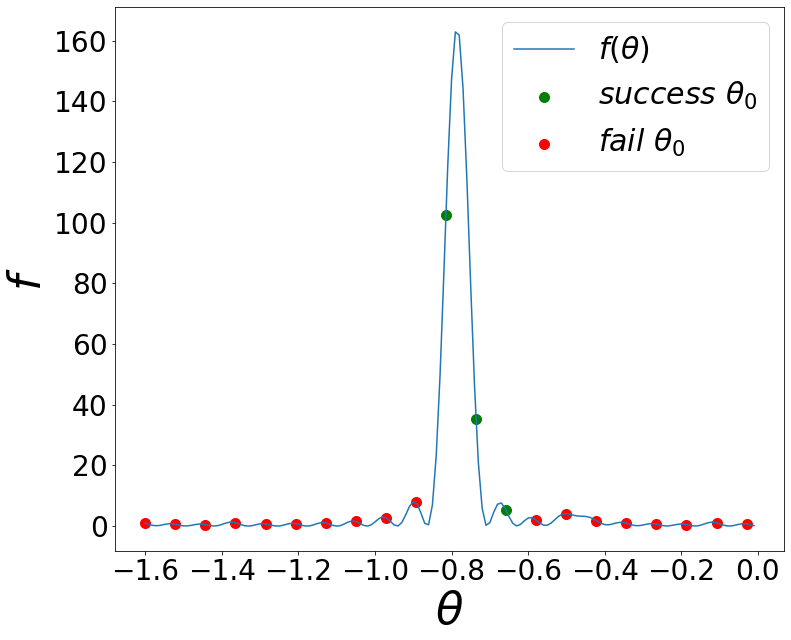

In [9]:
### loss function
TFIM_data=np.load('TFIM_8sites_data.npz')
spectrum=TFIM_data['name1']
population=TFIM_data['name2']
tau=5
NT=16
T=tau*NT
x=-1.6+np.arange(int(1.6/0.01))*(0.01)
z=-1.6+np.arange(int(1.6/(2*np.pi/T))+1)*(2*np.pi/T)
sf=np.zeros(len(z))
ts=tau*np.arange(NT)
Error=np.zeros(len(x),dtype = 'complex128')
Error_z=np.zeros(len(z),dtype = 'complex128')
for i in range(len(x)):
    for j in range(NT):
         Error[i]=Error[i]+np.dot(population,np.exp(-1j*(spectrum-x[i])*ts[j]))
for i in range(len(z)):
    for j in range(NT):
         Error_z[i]=Error_z[i]+np.dot(population,np.exp(-1j*(spectrum-z[i])*ts[j]))      
###------define function---------
def fun(x):
        signal=0
        for j in range(NT):
             signal=signal+np.dot(population,np.exp(-1j*(spectrum-x)*ts[j]))
        return (-abs(signal)**2)
##-------True minimizer---------
x0=spectrum[0]
min_z=minimize(fun,x0)
#--------solve minimization problem for different initial guess--------
for i in range(len(z)):
    x0=z[i]
    res=minimize(fun,x0)
    if abs(res.x[0]-min_z.x[0])<0.01:
        sf[i]=1
fig=plt.figure(figsize=(12,10))
plt.plot(x,abs(Error)**2,label=r"$f(\theta)$")
plt.scatter(z[np.where(sf==1)],abs(Error_z[np.where(sf==1)])**2,label=r"$success\ \theta_0$",c ="green")
plt.scatter(z[np.where(sf==0)],abs(Error_z[np.where(sf==0)])**2,label=r"$fail\ \theta_0$",c ="red")
plt.xlabel(r"$\theta$",fontsize=45)
plt.ylabel(r"$f$",fontsize=45) 
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.legend(fontsize=30)
plt.savefig('Loss_landscape.pdf')